In [1]:
import os

In [2]:
os.chdir('..')

In [3]:
os.listdir()

['.git',
 '.gitignore',
 '.idea',
 'data_loader',
 'data_processor',
 'jupyter',
 'loggers',
 'main.py',
 'models',
 'original_data',
 'processed_data',
 'README.md',
 'saved_models',
 'trainers']

In [4]:
from data_processor.utils import load_numpy_arrays, numpy_to_tensor
from models.Linear import LogisticRegression
import trainers.SGD_trainer
from loggers.statistics_loggers import plot_numerical_arrays
import torch

In [5]:
data_train, data_val = load_numpy_arrays(['data_train.npy', 'data_val.npy'], 
                                            path_prefix='processed_data/processed_features/4-genres/')

In [6]:
X_train, y_train = data_train[:, :-1], data_train[:, -1]
X_val, y_val = data_val[:, :-1], data_val[:, -1]

In [7]:
X_train, y_train, X_val, y_val = numpy_to_tensor([X_train, y_train, X_val, y_val])

In [8]:
y_train = y_train.type(torch.int64)
y_val = y_val.type(torch.int64)

In [9]:
print(X_train.shape)
print(y_train.shape)

torch.Size([3194, 57])
torch.Size([3194])


In [10]:
print(X_train[0])
print(y_train[0])

tensor([-1.5641, -0.8388, -0.6725, -0.4727, -1.1367, -0.9590, -1.2418, -0.6418,
        -1.4292, -1.0178, -0.6124, -0.7128, -0.3501, -0.5114, -0.2725, -0.8137,
         1.1590, -0.5819, -0.5639,  1.6685, -0.7834, -0.0464, -0.2956, -2.5771,
        -0.9344, -0.9167, -0.8403, -2.0586, -0.8075, -0.1764, -1.0677, -0.9795,
        -0.4747,  2.1352, -1.0326,  0.9913, -0.8415,  0.7881, -0.2459, -0.6958,
         0.1568,  0.6649, -0.4841, -1.1753,  0.7005, -0.8920, -0.3307, -0.8273,
        -0.4440,  0.2094, -0.4068, -0.3852,  0.1505, -0.7181,  0.3104, -1.0743,
         1.3346])
tensor(1)


In [11]:
print(X_val.shape)
print(y_val.shape)

torch.Size([400, 57])
torch.Size([400])


In [12]:
input_length = 57
output_length = 4
model = LogisticRegression(57, 4)

In [13]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
training_loss_array, training_accuracy_array, validation_loss_array, validation_accuracy_array = trainers.SGD_trainer.train(model, [X_train, y_train, X_val, y_val], 
                                                                                                                            loss, optimizer, batch_size=100, num_epoch=20)

Epoch  0: loss on final training batch: 0.6398
training accuracy: 79.99% validation accuracy: 81.50%
Epoch  1: loss on final training batch: 0.5261
training accuracy: 86.10% validation accuracy: 86.50%
Epoch  2: loss on final training batch: 0.4900
training accuracy: 87.48% validation accuracy: 88.50%
Epoch  3: loss on final training batch: 0.4667
training accuracy: 88.01% validation accuracy: 88.75%
Epoch  4: loss on final training batch: 0.4510
training accuracy: 88.42% validation accuracy: 88.75%
Epoch  5: loss on final training batch: 0.4393
training accuracy: 88.51% validation accuracy: 89.50%
Epoch  6: loss on final training batch: 0.4301
training accuracy: 88.89% validation accuracy: 89.25%
Epoch  7: loss on final training batch: 0.4226
training accuracy: 88.95% validation accuracy: 89.50%
Epoch  8: loss on final training batch: 0.4162
training accuracy: 88.98% validation accuracy: 89.00%
Epoch  9: loss on final training batch: 0.4107
training accuracy: 89.10% validation accurac

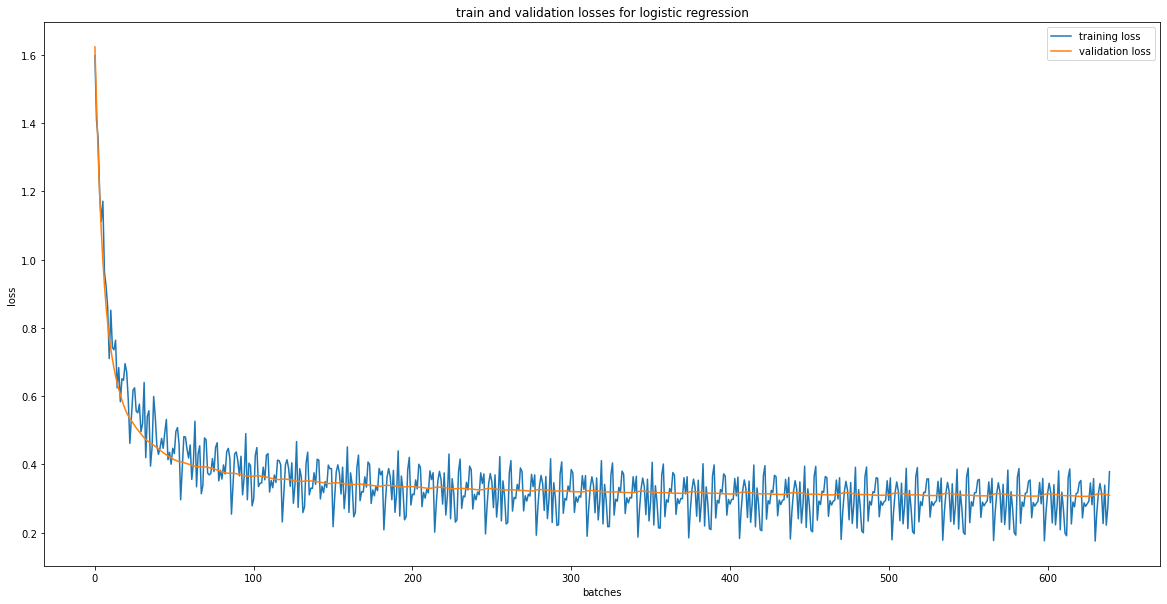

In [15]:
plot_numerical_arrays([training_loss_array, validation_loss_array], ['training loss', 'validation loss'], 
                      xlabel='batches', ylabel='loss', title='train and validation losses for logistic regression')

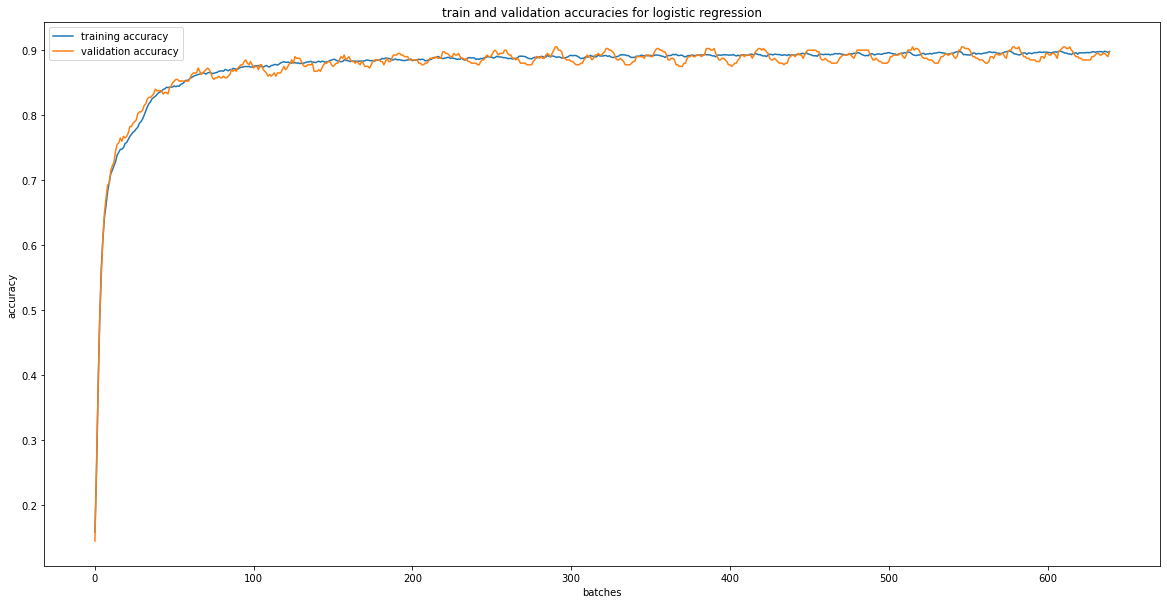

In [16]:
plot_numerical_arrays([training_accuracy_array, validation_accuracy_array], ['training accuracy', 'validation accuracy'], 
                      xlabel='batches', ylabel='accuracy', title='train and validation accuracies for logistic regression')

In [17]:
torch.save(model.state_dict(), 'saved_models/saved_logistic_regression_csv.pt')